# Clustering Models

One of the most frequently considered models using unsupervised learning is clustering models. Unlike classification tasks, in clustering, we often do not have prior knowledge about the types of groups into which the data is divided. It is therefore a technique for exploring information within the data. We will present several commonly used algorithms.


In [11]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X.size

600

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# K-Means

Let's move on to creating the model. That would be a k-Means model

The K-means algorithm aims to find k points that act as centroids. The algorithm is presented as follows:

1. Specify the number of clusters.
2. Randomly divide the set of observations into disjoint and non-empty clusters.
3. Determine the center of each cluster as the arithmetic mean of the coordinates of the points.
4. Update the assignment of each row to a cluster by assigning it to its nearest cluster.
5. Repeat steps 3-4 until the solution stabilizes (no exchanges between clusters).

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

km.fit(X)

KMeans(n_clusters=3)

In [14]:
y_hat = km.predict(X)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

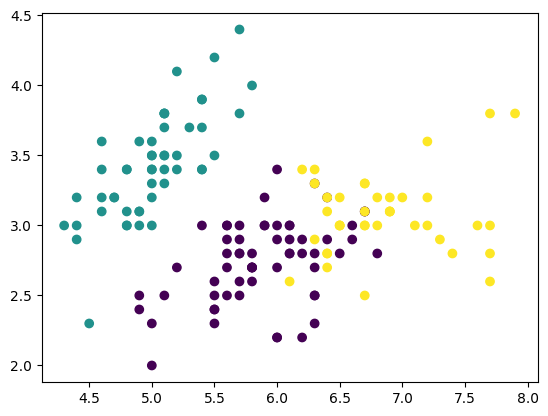

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

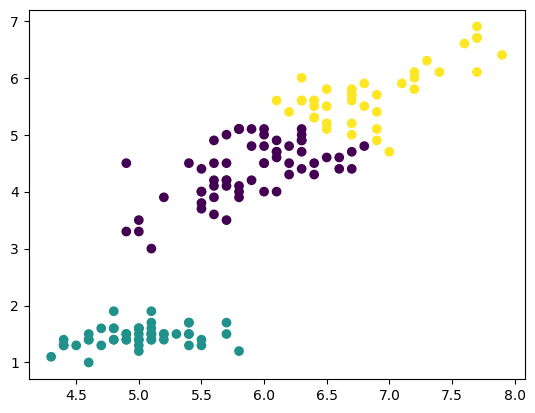

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

# Hierarchical Clustering Analysis (Dendrograms)

One of the major limitations of the K-means algorithm is the need to specify the number of clusters in advance. This problem is somewhat alleviated by algorithms that create dendrograms, such as agglomerative clustering algorithms.

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3)

cluster.fit(X)

AgglomerativeClustering(n_clusters=3)

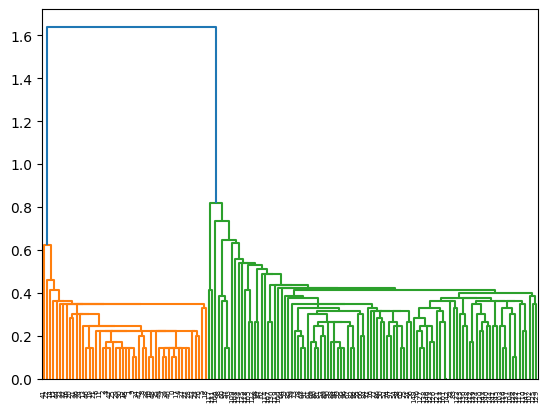

In [18]:
from scipy.cluster.hierarchy import *

dendrogram(single(X))
plt.show()

In [19]:
y_hat = cluster.labels_

Based on such a dendrogram, we can often consider how many groups to consider. Here, perhaps a reasonable division would be into 3 groups (not the same as indicated by the colors).

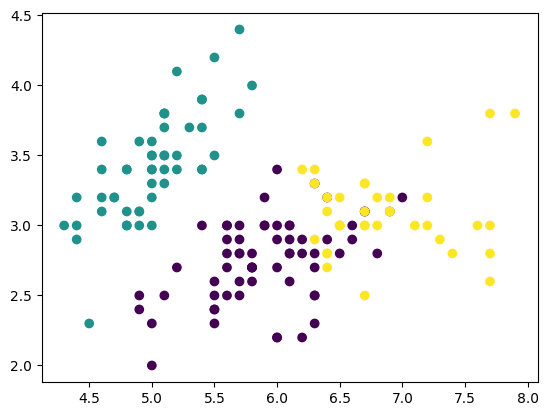

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

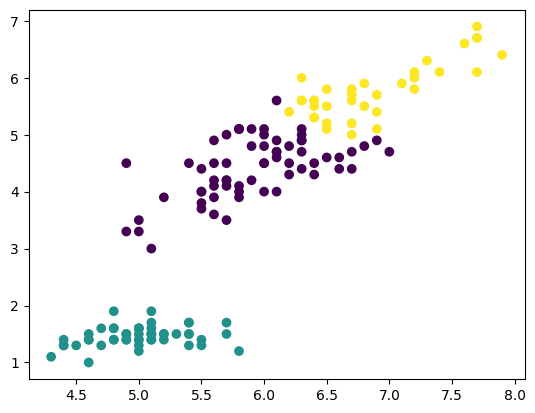

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

# DBSCAN

One of the most commonly recommended clustering algorithms is DBSCAN - a clustering algorithm based on density with noise option.

The algorithm works as follows:

1. A certain starting point is chosen.
1. Then, every point from the dataset that is closer than $\varepsilon$ to any element of the group is added to the group.
1. Points are added to the group until there are no more points within the $\varepsilon$ range around the group.
1. If the group turns out to be sizable, it becomes a resulting cluster; if it is small, it is marked as noise.
1. If there are still unassigned points, a new starting point is chosen to build another group.

In [22]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.25)

dbs.fit(X)

y_hat = dbs.labels_

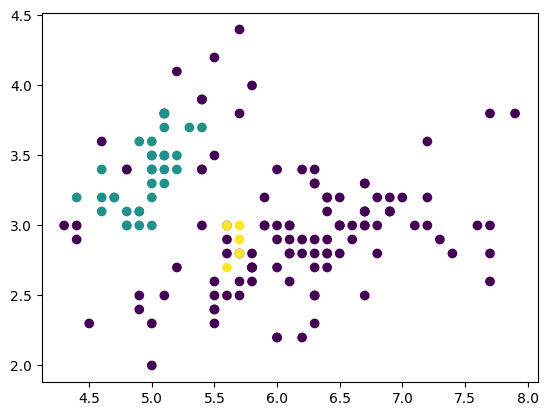

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

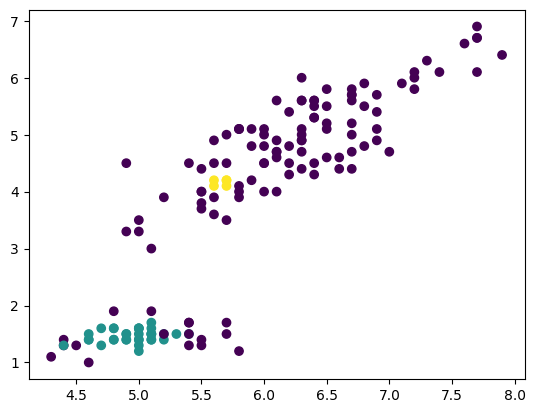

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2]
plt.scatter(x, y, c=y_hat)
plt.show()

# EM Algorithm

The EM algorithm has a similar idea to K-means, but instead of a rigid assignment to a group/cluster, we have a probabilistic assignment.

Groups are represented by multidimensional distributions (e.g., normal), which means that clusters intersect in a probabilistic sense (an element belongs to group 1 with a certain probability and to group 2 with another).

In this algorithm, the following are alternately assessed:

1. probabilities of belonging to specific groups (Bayes probabilities), and
1. probabilities of the parameters of the mixture are estimated.

In [25]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3)
y_hat = gmm.fit_predict(X)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

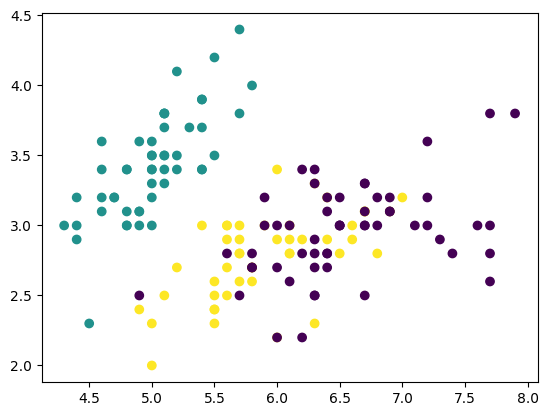

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

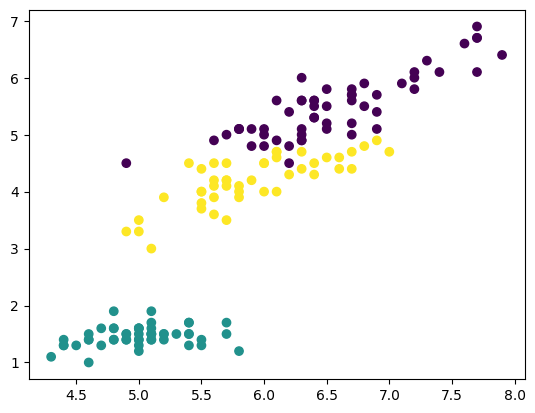

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

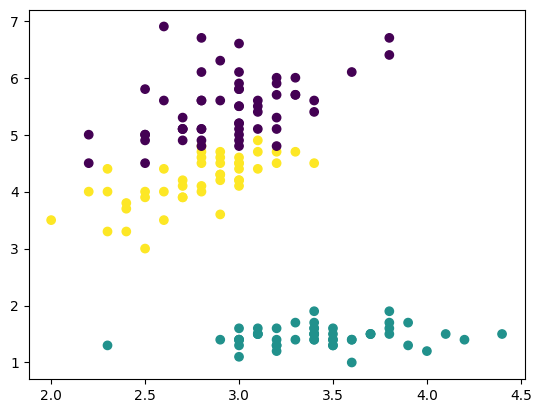

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 1]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

# Mean-shift Algorithm

Another available algorithm is Mean-shift, which is unique in that it does not assume a fixed number of components in advance.

In [30]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X)
y_hat = ms.labels_
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

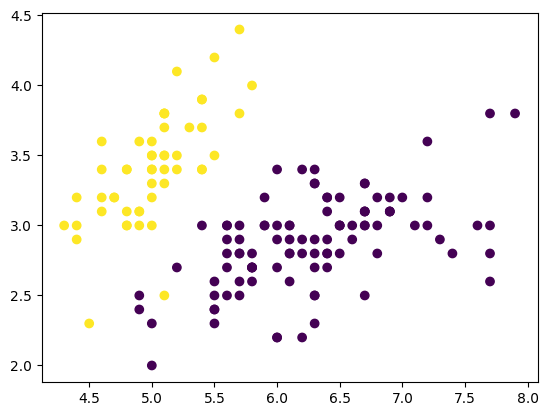

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 1];
plt.scatter(x, y, c=y_hat)
plt.show()

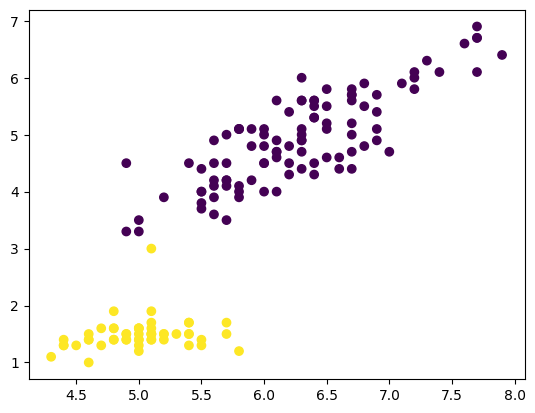

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 0]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()

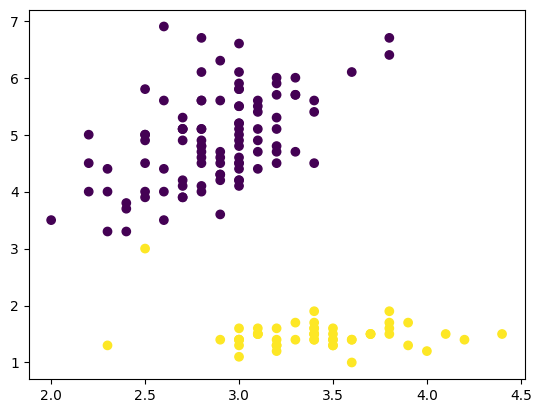

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
x = X[:, 1]
y = X[:, 2];
plt.scatter(x, y, c=y_hat)
plt.show()